## Desafio 4 - Trilhas de Dados
**Aluna: Nargylla Fernanda Cloviel Lima**

Informações importantes

- Altere os nomes das colunas para letras minúsculas, utilizando a biblioteca pandas;
- Explore colunas categóricas, utilizando função ***groupby()*** e outras, visando aplicar os gráficos para visualizações e a compreensão desses dados.
- Explore colunas numéricas, utilizando a função ***describe**()*, faça um *boxplot* ou outro gráfico que achar necessário, utilizando as bibliotecas pandas e  **seaborn;**
- **Corrigir os dados faltantes  (*NANs)*** e preencher as lacunas com valores adequados.
- **Tratar os outliers, substituindo-os pelos valores adequados**.
- **Eliminar os duplicados, para** garantir a unicidade.
- **corrigir os dados categóricos, por exemplo,** "Mas" para "Masculino", "Fem" para "Feminino" e outras inconsistências se houver, para adequá-los ao padrão.
- Mostre o tamanho dos dados importados, utilizando o *shape*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### LIMPEZA DE DADOS

Colocando as colunas minúsculas

In [2]:
df = pd.read_csv('/content/Trilhas2B-Desafio 4  - Churn.csv')
df.columns = df.columns.str.lower()
print(df.columns)

Index(['id', 'pontos', 'estado', 'genero', 'idade', 'bens', 'saldo na conta',
       'produtos', 'possui cartao', 'ativo', 'salario anual', 'saiu'],
      dtype='object')


In [3]:
print("Tamanho do DataFrame:", df.shape)

Tamanho do DataFrame: (999, 12)


Tratamento de valores nulos, faltantes e incorretos

In [4]:
print("Valores ausentes:\n", df.isnull().sum())

Valores ausentes:
 id                0
pontos            0
estado            0
genero            8
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     7
saiu              0
dtype: int64


In [5]:
# valores ausentes
df['genero'] = df['genero'].fillna('Não informado')
df['estado'] = df['estado'].fillna('Desconhecido')
df['saldo na conta'] = df['saldo na conta'].fillna(df['saldo na conta'].median())
df['salario anual'] = df['salario anual'].fillna(df['salario anual'].median())
df['saiu'] = df['saiu'].fillna(0)

In [6]:
# removendo as duplicadas
df.drop_duplicates(inplace=True)

In [7]:
#corrigindo a coluna de gênero
df['genero'] = df['genero'].str.lower().str.strip()

df['genero'] = df['genero'].replace({
    'mas': 'masculino',
    'masc': 'masculino',
    'm': 'masculino',
    'fem': 'feminino',
    'f': 'feminino',
    'femin': 'feminino',
    'não informado': 'nao informado'
})

In [8]:
# Função para tratar outliers usando Interquartile Range
def tratar_outliers(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    mediana = df[coluna].median()
    df.loc[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior), coluna] = mediana

tratar_outliers('salario anual')
tratar_outliers('saldo na conta')

<ipython-input-8-bc04b6d177f5>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8926348.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior), coluna] = mediana


genero
feminino         120
masculino         82
nao informado      1
Name: saiu, dtype: int64


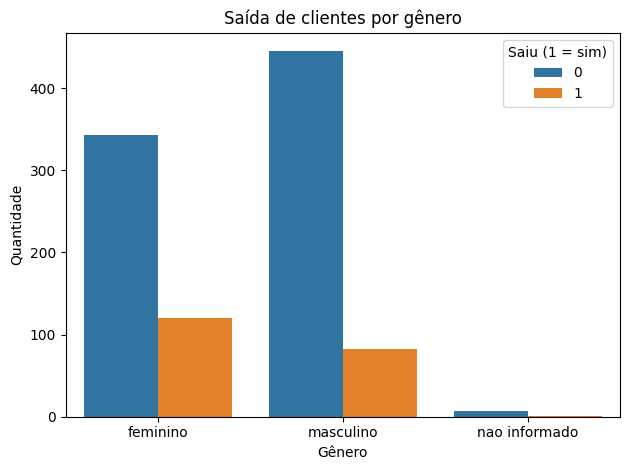

In [9]:
#Saídas de clientes por gênero sem tratamento de outliers

saidas_por_genero = df.groupby('genero')['saiu'].sum()
print(saidas_por_genero)

sns.countplot(data=df, x='genero', hue='saiu')
plt.title('Saída de clientes por gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Saiu (1 = sim)')
plt.tight_layout()
plt.show()


Saldo médio na conta por estado:
estado
CE     6322307.95
MA    11108286.45
MG           0.00
PI     5464515.32
RP           0.00
SP    13884802.00
Name: saldo na conta, dtype: float64


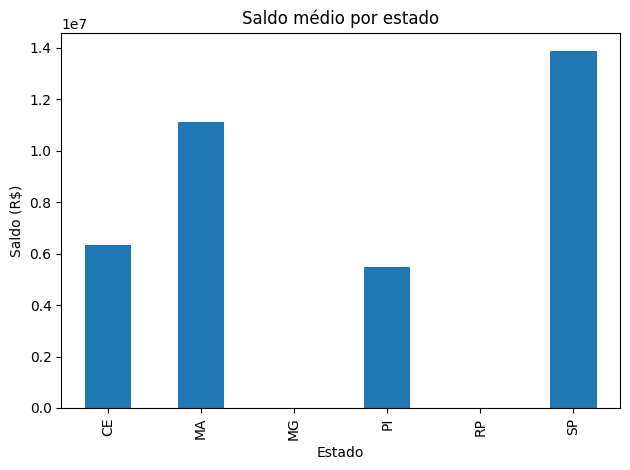

In [10]:
# Saldo médio na conta por estado
print("\nSaldo médio na conta por estado:")
print(df.groupby('estado')['saldo na conta'].mean().round(2))

df.groupby('estado')['saldo na conta'].mean().plot(kind='bar', title='Saldo médio por estado', ylabel='Saldo (R$)', xlabel='Estado')
plt.tight_layout()
plt.show()

genero
feminino         49.14
masculino        49.95
nao informado     0.91
Name: saldo na conta, dtype: float64


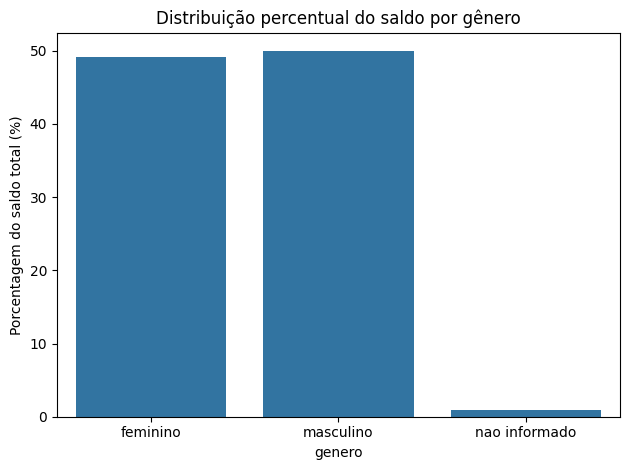

In [11]:
# Saldo médio na conta por gênero
saldo_total = df['saldo na conta'].sum()
saldo_por_genero = df.groupby('genero')['saldo na conta'].sum()
porcentagem_saldo = (saldo_por_genero / saldo_total) * 100

print(porcentagem_saldo.round(2))

sns.barplot(x=porcentagem_saldo.index, y=porcentagem_saldo.values)
plt.ylabel("Porcentagem do saldo total (%)")
plt.title("Distribuição percentual do saldo por gênero")
plt.tight_layout()
plt.show()



Taxa de saída por estado:
estado
CE    0.20
MA    0.29
MG    0.00
PI    0.16
RP    1.00
SP    0.00
Name: saiu, dtype: float64


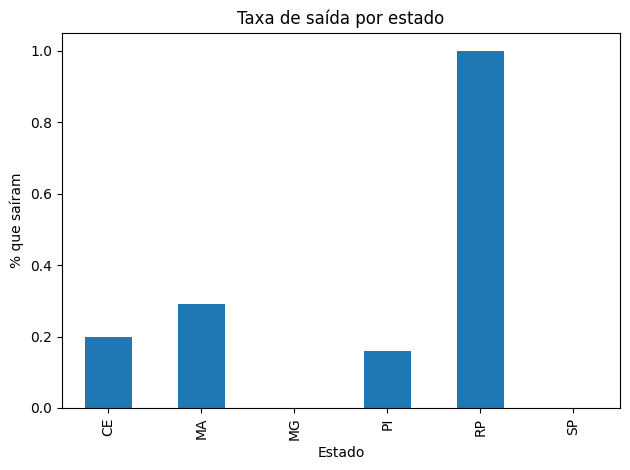

In [12]:
# Taxa de saída por estado
print("\nTaxa de saída por estado:")
print(df.groupby('estado')['saiu'].mean().round(2))

df.groupby('estado')['saiu'].mean().plot(kind='bar', title='Taxa de saída por estado', ylabel='% que saíram', xlabel='Estado')
plt.tight_layout()
plt.show()

### ESTATÍSTICA

In [13]:
# Média e mediana do saldo na conta dos clientes abaixo de 40 anos
abaixo_40 = df[df['idade'] < 40]
print("Clientes com menos de 40 anos:")
print("Média do saldo na conta:", abaixo_40['saldo na conta'].mean())
print("Mediana do saldo na conta:", abaixo_40['saldo na conta'].median())


Clientes com menos de 40 anos:
Média do saldo na conta: 7015427.852596315
Mediana do saldo na conta: 8229382.0


In [14]:
# Média e mediana do saldo na conta dos clientes com 40 anos ou mais
acima_ou_igual_40 = df[df['idade'] >= 40]
print("\nClientes com 40 anos ou mais:")
print("Média do saldo na conta:", acima_ou_igual_40['saldo na conta'].mean())
print("Mediana do saldo na conta:", acima_ou_igual_40['saldo na conta'].median())



Clientes com 40 anos ou mais:
Média do saldo na conta: 7381265.972568579
Mediana do saldo na conta: 9731825.0


In [15]:
# Média e mediana do saldo na conta dos que saíram e dos que permaneceram
print("\nMédia e mediana do saldo na conta por status de saída:")
print(df.groupby('saiu')['saldo na conta'].agg(['mean', 'median']).round(2))


Média e mediana do saldo na conta por status de saída:
            mean      median
saiu                        
0     6814752.81   8061393.0
1     8523988.16  10843187.0


In [16]:
#Dos que saíram, mostre o público predominante (Masculino ou Feminino), idade, saldo, bens e estado
saiu_df = df[df['saiu'] == 1]


genero_predominante = saiu_df['genero'].value_counts().idxmax()
print(f"\nGênero predominante entre os que saíram: {genero_predominante}")


print("\nEstatísticas dos clientes que saíram:")

print("Idade - Média:", saiu_df['idade'].mean(),
      " | Mediana:", saiu_df['idade'].median())

print("Saldo na conta - Média:", saiu_df['saldo na conta'].mean(),
      " | Mediana:", saiu_df['saldo na conta'].median())

print("Bens - Média:", saiu_df['bens'].mean(),
      " | Mediana:", saiu_df['bens'].median())

print("\nDistribuição por estado (top 5):")
print(saiu_df['estado'].value_counts().head())



Gênero predominante entre os que saíram: feminino

Estatísticas dos clientes que saíram:
Idade - Média: 44.49753694581281  | Mediana: 45.0
Saldo na conta - Média: 8523988.157635467  | Mediana: 10843187.0
Bens - Média: 4.729064039408867  | Mediana: 5.0

Distribuição por estado (top 5):
estado
PI    76
MA    75
CE    51
RP     1
Name: count, dtype: int64


In [17]:
top_saida_estado_idade = (
    df[df['saiu'] == 1]
    .groupby(['estado', 'idade'])
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
    .head(5)
)

print("Top 5 combinações de estado + idade com mais saídas:")
print(top_saida_estado_idade)


Top 5 combinações de estado + idade com mais saídas:
   estado  idade  quantidade
82     PI     46           7
87     PI     51           6
80     PI     43           6
49     MA     45           6
10     CE     39           6


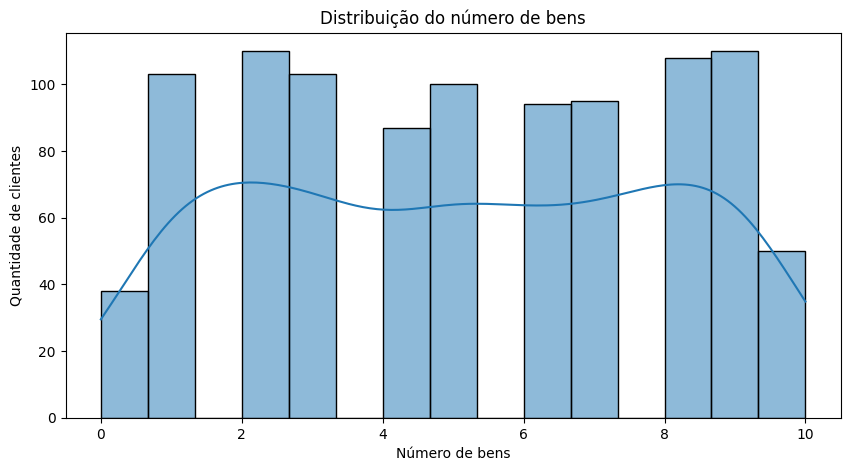

In [18]:
# Histograma da distribuição de bens
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bens', bins=15, kde=True)
plt.title('Distribuição do número de bens')
plt.xlabel('Número de bens')
plt.ylabel('Quantidade de clientes')
plt.show()

